In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af

# 1. Load patient data

In [2]:
#patient1 - Subject 9
contour_path1="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/rtstruct/rtss.dcm"
img_path1="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/ct"
contour1=pydicom.read_file(contour_path1)
contours1=af.read_structure(contour1)
slices1 = [pydicom.read_file(img_path1 + '/' + s) for s in os.listdir(img_path1)]
image1 = np.stack([s.pixel_array for s in slices1], axis=-1)
label1, colors1 = af.get_mask(contours1, slices1, image1)

In [3]:
#patient2 - Subject 3
contour_path2="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/3/rtstruct/rtss.dcm"
img_path2="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/3/ct"
#read img and contour
contour2=pydicom.read_file(contour_path2)
contours2= af.read_structure(contour2)
slices2 = [pydicom.read_file(img_path2 + '/' + s) for s in os.listdir(img_path2)]
image2 = np.stack([s.pixel_array for s in slices2], axis=-1)
label2, colors2 = af.get_mask(contours2, slices2, image2)

In [4]:
#patient2 - Subject 1
contour_path3="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/1/rtstruct/rtss.dcm"
img_path3="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/1/ct"
#read img and contour
contour3=pydicom.read_file(contour_path3)
contours3=af.read_structure(contour3)
slices3 = [pydicom.read_file(img_path3 + '/' + s) for s in os.listdir(img_path3)]
image3 = np.stack([s.pixel_array for s in slices3], axis=-1)
label3, colors3 = af.get_mask(contours3, slices3, image3)

# 2. Graph of HU and original contour

## Patient 1 (Subject 9)

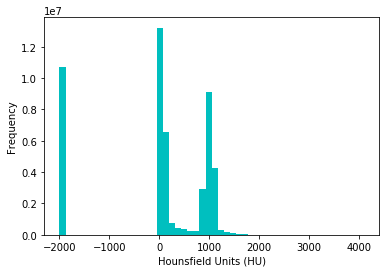

Slice Thickness: 2.500000
Pixel Spacing (row, col): (0.976562, 0.976562) 


In [5]:
#patient1
plt.hist(image1.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices1[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices1[0].PixelSpacing[0], slices1[0].PixelSpacing[1]))

C:\Users\lykha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


(-0.5, 511.5, 511.5, -0.5)

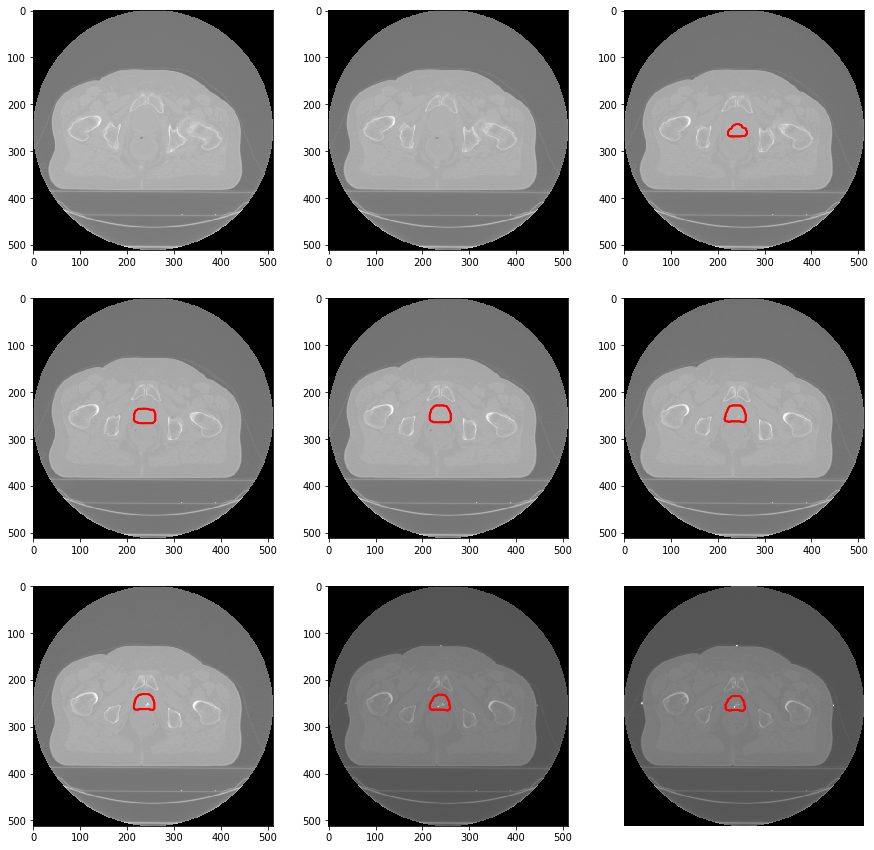

In [6]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image1[..., i + 15 ], cmap="gray")
    plt.contour(label1[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.axis('off')

## Patient 2 (Subject 3)

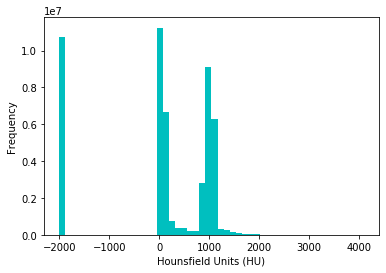

Slice Thickness: 2.500000
Pixel Spacing (row, col): (0.976562, 0.976562) 


In [7]:
#patient2
plt.hist(image2.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices2[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices2[0].PixelSpacing[0], slices2[0].PixelSpacing[1]))

(-0.5, 511.5, 511.5, -0.5)

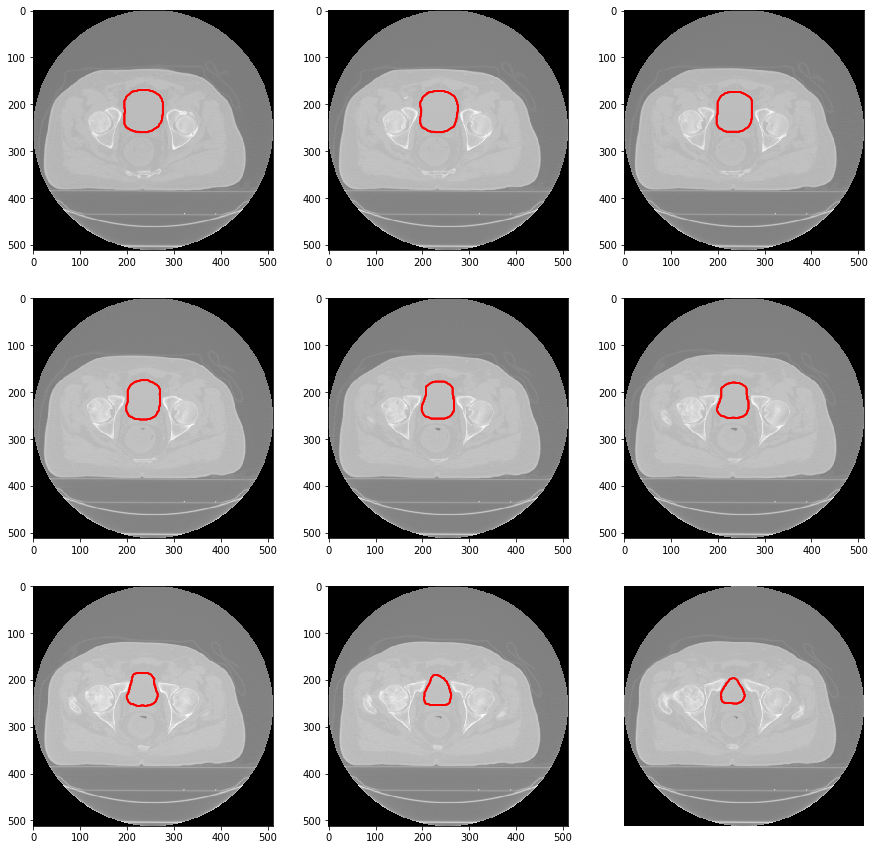

In [8]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image2[..., i + 180 ], cmap="gray")
    plt.contour(label2[..., i + 180 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.axis('off')

## Patient 3 (Subject 1)

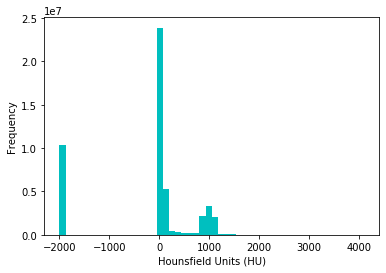

Slice Thickness: 2.500000
Pixel Spacing (row, col): (1.269531, 1.269531) 


In [9]:
#patient3
plt.hist(image3.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices1[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices3[0].PixelSpacing[0], slices3[0].PixelSpacing[1]))

(-0.5, 511.5, 511.5, -0.5)

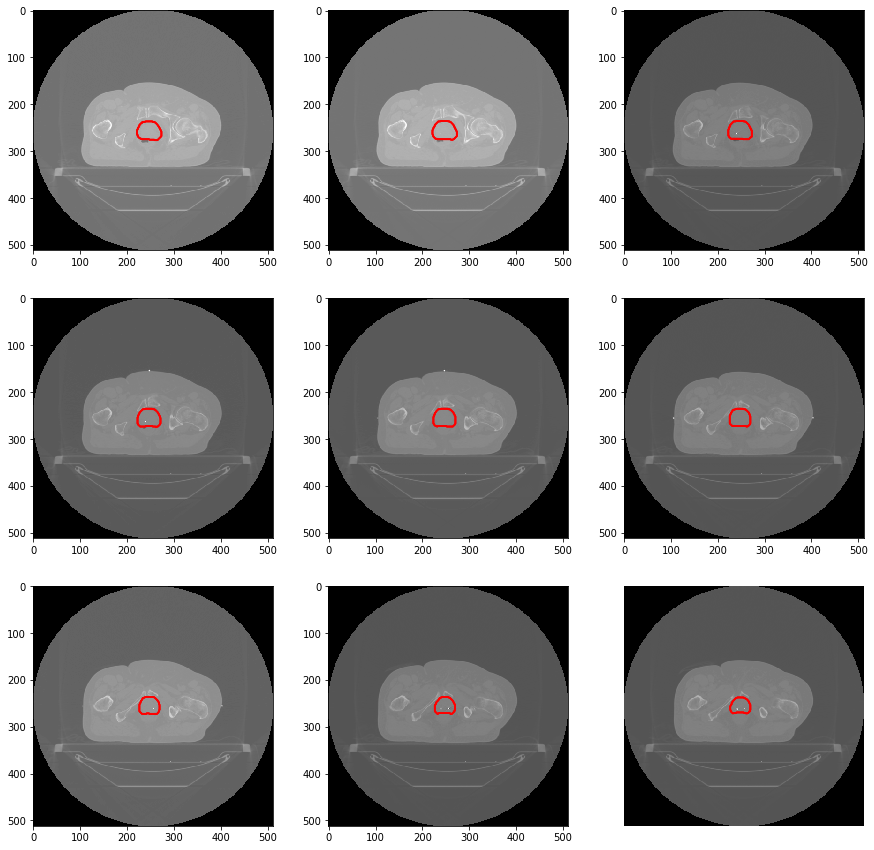

In [10]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image3[..., i + 15 ], cmap="gray")
    plt.contour(label3[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.axis('off')

In [11]:
# choose target img for patient1
target_img1 = image1[..., 19]
target_label1 = label1[..., 19]
mask1 = np.where(target_label1!=0,4,0)
surface1, interior1 = af.make_surface_contour(mask1)
surface_cord1 = np.argwhere(surface1 != 0).tolist()

In [12]:
# choose target img for patient2
target_img2 = image2[..., 185]
target_label2 = label2[..., 185]
mask2 = np.where(target_label2!=0,4,0)
surface2, interior2 = af.make_surface_contour(mask2)
surface_cord2 = np.argwhere(surface2 != 0).tolist()

In [13]:
# choose target img for patient3
target_img3 = image3[..., 16]
target_label3 = label3[..., 16]
mask3 = np.where(target_label3!=0,4,0)
surface3, interior3 = af.make_surface_contour(mask3)
surface_cord3 = np.argwhere(surface3 != 0).tolist()

# 3. Different paramenters on the same slice

# 3.1 Different c for SD

(300.0, 190.0, 300.0, 190.0)

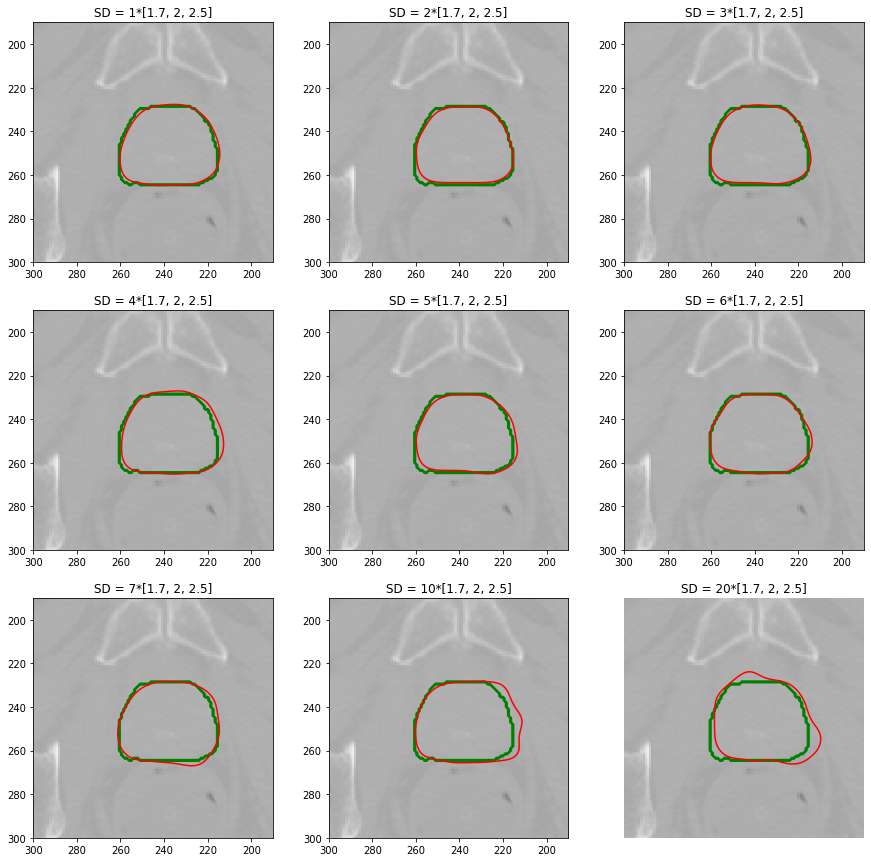

In [207]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
c = [1, 2, 3, 4, 5, 6, 7, 10, 20]
        
for i in range(len(c)):
    SD=[c[i]*1.7, c[i]*2, c[i]*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, k=40, w=6, smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("SD = " + str(c[i]) + "*[1.7, 2, 2.5]")
plt.axis('off')

SD helps in create the variations (or noise) from the original contour. After a a few experimentation, we find that 5*[1.7, 2, 2.5] seems to be a good SD for the our algorithm since it is a threshold where the contour starts to have some uncertainties and not too much variation that distorts the original shape as in the SD after it.

## 3.2: Different k nearest neighbor for smoothing

(300.0, 190.0, 300.0, 190.0)

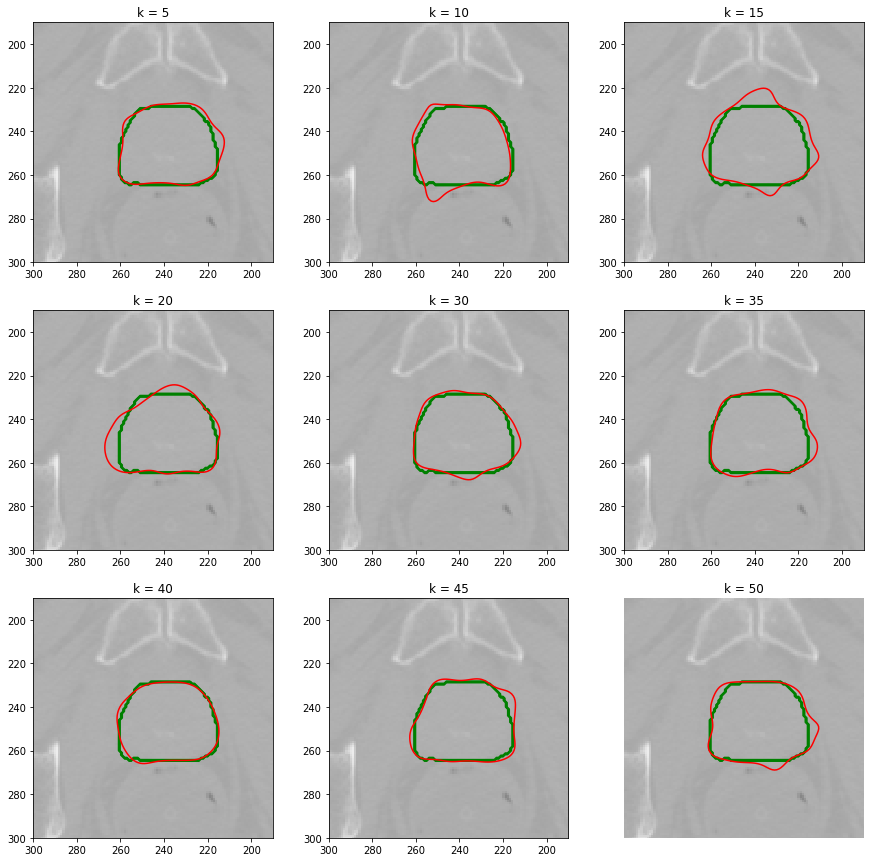

In [219]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
k = [5, 10, 15, 20, 30, 35, 40, 45, 50]
        
for i in range(len(k)):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, k=i, w=6, smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("k = " + str(k[i]))
plt.axis('off')

We find k nearest neighbors to smooth out the gradient for the purpose of smoothing the contour while processing the ASSD alogorithm. k = 20 seems to be a good parameter in this plot since it doesn't drastically smoothing out the contour. Therefore, we pick k = 15 for our next step.

## 3.3: Different R/w for Truncated Gaussian function 

(300.0, 190.0, 300.0, 190.0)

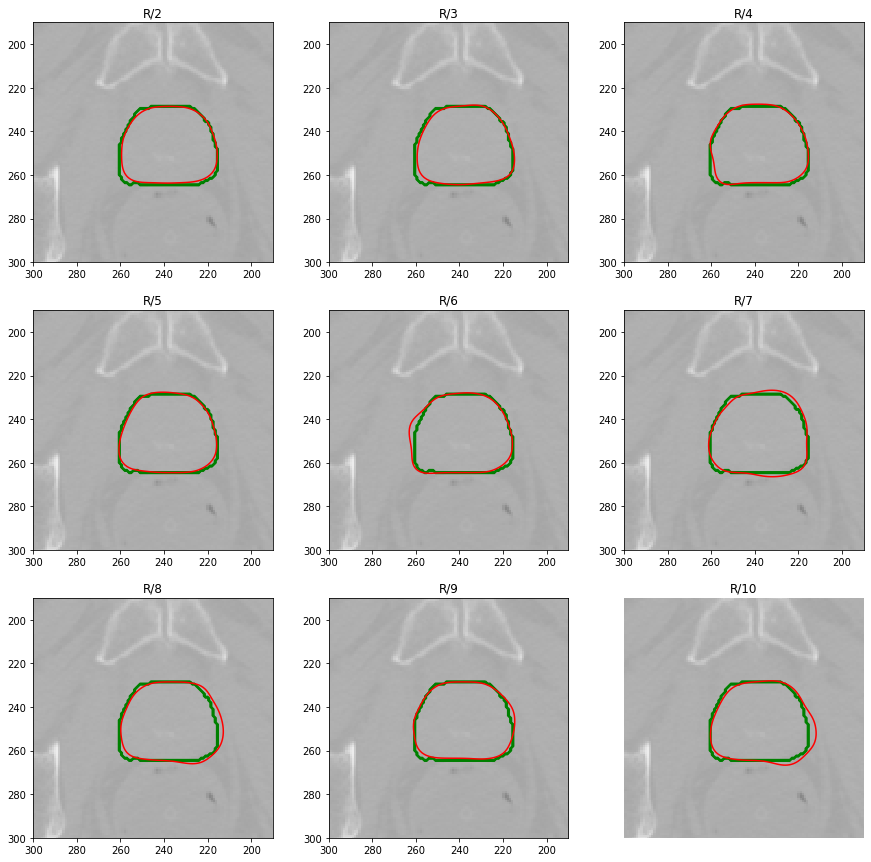

In [220]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
w = [2, 3, 4, 5, 6, 7, 8, 9, 10]
        
for i in range(len(w)):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, k=40, w=w[i], smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("R/" + str(w[i]))
plt.axis('off')

R/w is used in the Truncated Gaussian in order to move to voxel inward and outward in groups so that the final coutour looks more naaturally as it is drawn by human (not machine). R/4 seems to be a good parameter since it where the contour has some uncertainties and not too much viration that distorts the original shape. It seems like a ideal bad countouring that a clinician may draw in real life. 

(300.0, 190.0, 300.0, 190.0)

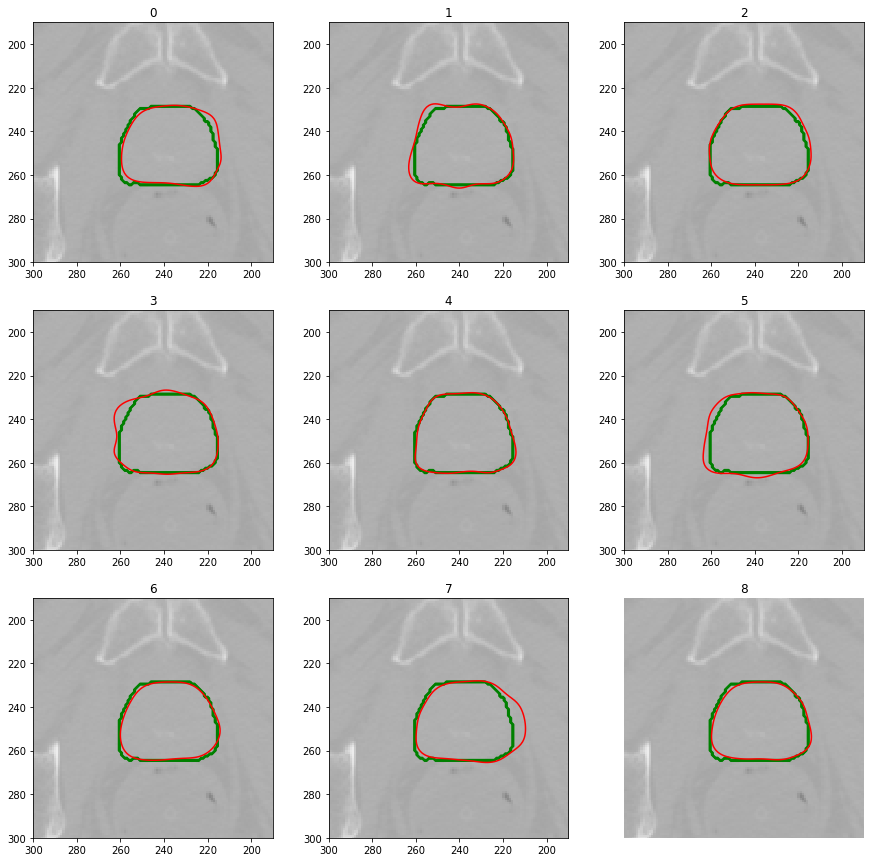

In [39]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))

for i in range(9):
    c = 4
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, k=50, w=8, smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title(str(i))
plt.axis('off')

In [ ]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))

for i in range(16):
    c = 2
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, k=50, w=6, smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    plt.subplot(4, 4, i + 1)
    plt.imshow(target_img1, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title(str(i))
plt.axis('off')

# 4. Different subjects:

## Patient 1 (Subject 9)

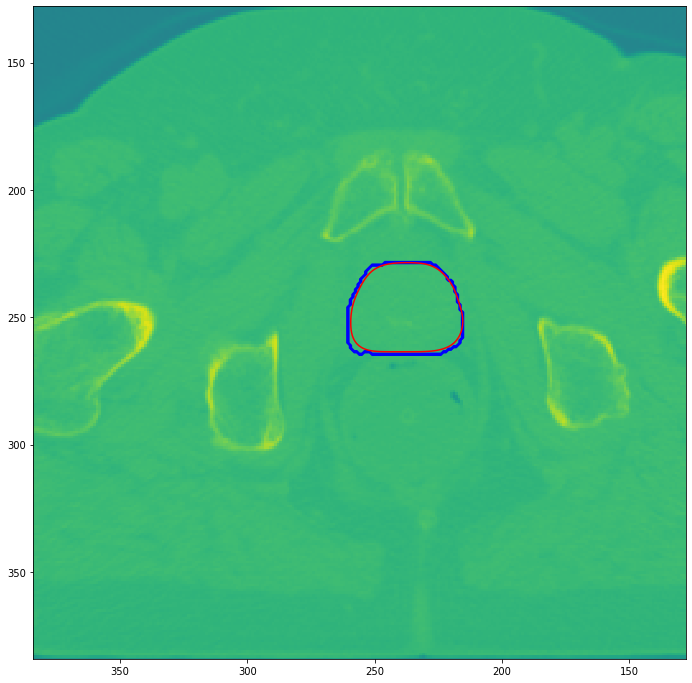

In [46]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 4
SD=[c*1.7, c*2, c*2.5]
w = 8
k = 50
circles = 3
dx, dy, mask, t, L = af.assd(target_img1, target_label1, voxelsize, a, SD, circles, k, w, smooth=True, blur=True)
du_1 = af.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=True, display=False)

## Patient 2 (Subject 3)

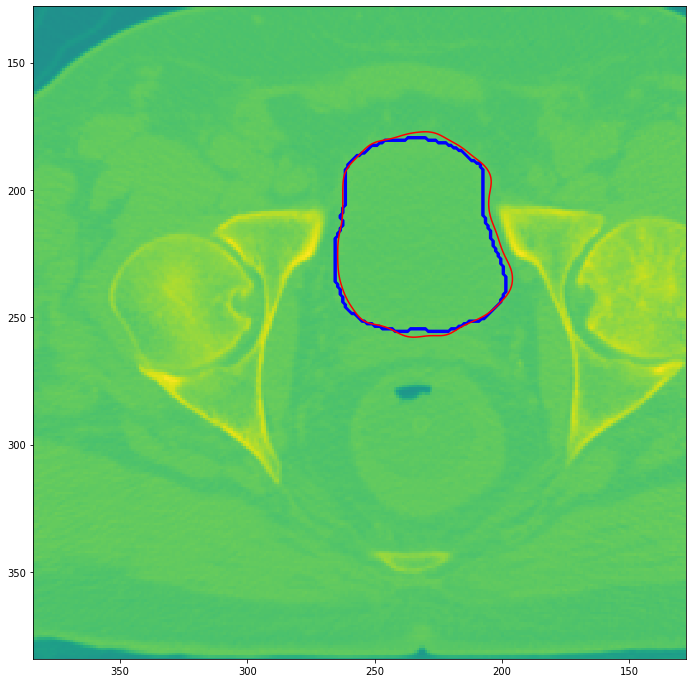

In [44]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 4
SD=[c*1.7, c*2, c*2.5]
w = 8
k = 50
circles = 3
dx, dy, mask, t, L = af.assd(target_img2, target_label2, voxelsize, a, SD, circles, k, w, smooth=True, blur=True)
du_2 = af.plotting_assd(dx, dy, mask, target_img2, quiver=False, plot=True, display=False)

## Patient 3 (Subject 1)

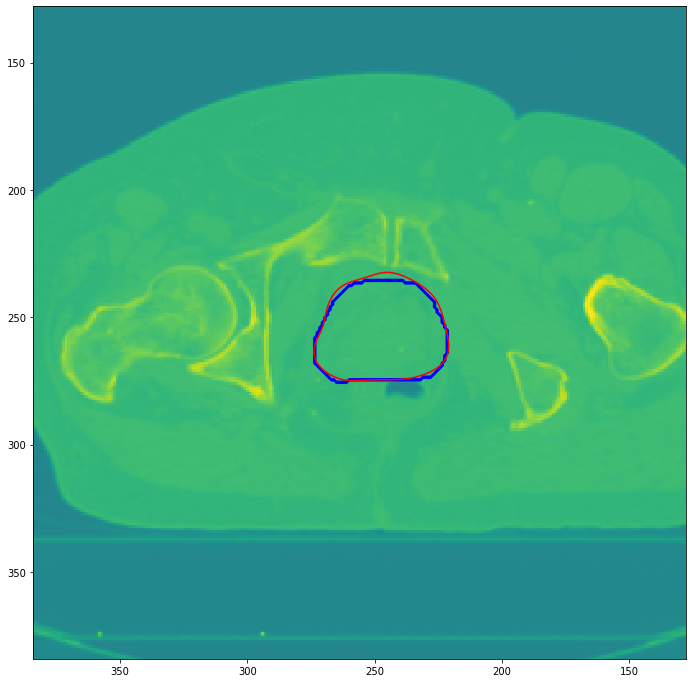

In [42]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 4
SD=[c*1.7, c*2, c*2.5]
w = 8
k =50
circles = 3
dx, dy, mask, t, L = af.assd(target_img3, target_label3, voxelsize, a, SD, circles, k, w, smooth=True, blur=True)
du_3 = af.plotting_assd(dx, dy, mask, target_img3, quiver=False, plot=True, display=False)

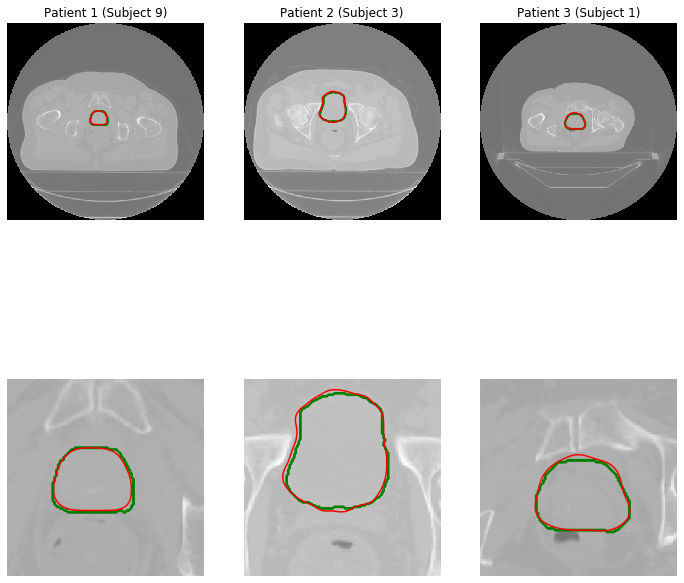

In [45]:
fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Patient 1 (Subject 9)")
ax[0, 0].imshow(target_img1, cmap='gray')
ax[0, 0].contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='green')
ax[0, 0].contour(du_1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Patient 2 (Subject 3)")
ax[0, 1].imshow(target_img2, cmap='gray')
ax[0, 1].contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='green')
ax[0, 1].contour(du_2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Patient 3 (Subject 1)")
ax[0, 2].imshow(target_img3, cmap='gray')
ax[0, 2].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='green')
ax[0, 2].contour(du_3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

#ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img1, cmap='gray')
ax[1, 0].contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='green')
ax[1, 0].contour(du_1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(190, 300)
ax[1, 0].set_ylim(300, 190)
ax[1, 0].axis('off')

#ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(target_img2, cmap='gray')
ax[1, 1].contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='green')
ax[1, 1].contour(du_2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(170, 300)
ax[1, 1].set_ylim(300, 170)
ax[1, 1].axis('off')

#ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(target_img3, cmap='gray')
ax[1, 2].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='green')
ax[1, 2].contour(du_3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(190, 300)
ax[1, 2].set_ylim(300, 190)
ax[1, 2].axis('off')

plt.show()

*-> Based on the above plots, we can see that the algorithm works fine on different subjects.*

# 5. Different view on patient 3

**Frontal (Coronal) slice**

In [21]:
frontal_target_img = image3[250, 0:512, 0:100]
frontal_target_label = label3[250, 0:512, 0:100]

In [ ]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 4
SD=[c*1.7, c*2, c*2.5]
w = 6
k = 50
circles = 3
dx, dy, mask, t, L = af.assd(frontal_target_img, frontal_target_label, voxelsize, a, SD, circles, k, w, smooth=True, blur=True)
frontal_du = af.plotting_assd(dx, dy, mask, frontal_target_img, quiver=False, plot=False, display=False)

**Sagittal slice**

In [23]:
sagittal_target_img = image3[0:512, 260, 0:90]
sagittal_target_label = label3[0:512, 260, 0:90]

In [ ]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 4
SD=[c*1.7, c*2, c*2.5]
w = 6
k = 50
circles = 3
dx, dy, mask, t, L = af.assd(sagittal_target_img, sagittal_target_label, voxelsize, a, SD, circles, k, w, smooth=True, blur=True)
sagittal_du = af.plotting_assd(dx, dy, mask, sagittal_target_img, quiver=False, plot=False, display=False)

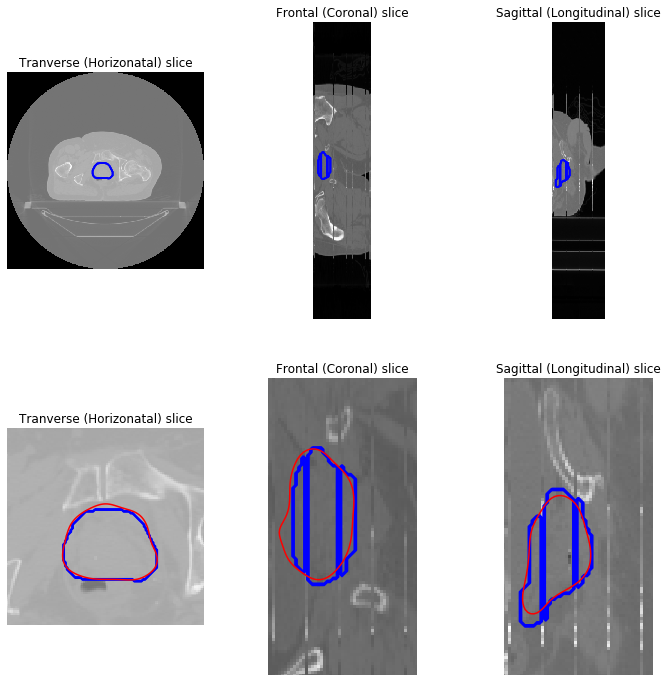

In [60]:
fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Tranverse (Horizonatal) slice")
ax[0, 0].imshow(target_img3, cmap='gray')
ax[0, 0].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Frontal (Coronal) slice")
ax[0, 1].imshow(frontal_target_img, cmap='gray')
ax[0, 1].contour(frontal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Sagittal (Longitudinal) slice")
ax[0, 2].imshow(sagittal_target_img, cmap='gray')
ax[0, 2].contour(sagittal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img3, cmap='gray')
ax[1, 0].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(190, 300)
ax[1, 0].set_ylim(300, 190)
ax[1, 0].axis('off')

ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(frontal_target_img, cmap='gray')
ax[1, 1].contour(frontal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(frontal_du, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(0, 50)
ax[1, 1].set_ylim(300, 200)
ax[1, 1].axis('off')

ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(sagittal_target_img, cmap='gray')
ax[1, 2].contour(sagittal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(sagittal_du, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(0, 50)
ax[1, 2].set_ylim(300, 200)
ax[1, 2].axis('off')

plt.show()

*-> Based on the above plots, we can see that the algorithm works fine on different views.*

# 4. Different slices of the same patient (Patient 1)

In [65]:
assd_contour = []

for i in range(11):
    if i != 6:
        a=50
        voxelsize = np.array([0.976562, 0.976562, 2.5])
        c = 4
        SD=[c*1.7, c*2, c*2.5]
        dx, dy, mask, t, L  = af.assd(image1[..., i + 18], label1[..., i + 18], voxelsize, a, SD, circles=3, k=50, w=6, smooth=True, blur=True)
        du = af.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
        du_2 = np.where(du < 0.5, 0, 4)
        mask = np.where(du_2 != 0, 4, 0)
        surface, interior = af.make_surface_contour(mask)
    
    elif i == 6:
        surface = label1[..., i + 18]
    assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour).transpose(1, 2, 0)
label_cpy = label1.copy()
label_cpy[..., 17:28] = assd_contour
assd_contour = label_cpy

(300.0, 190.0, 300.0, 190.0)

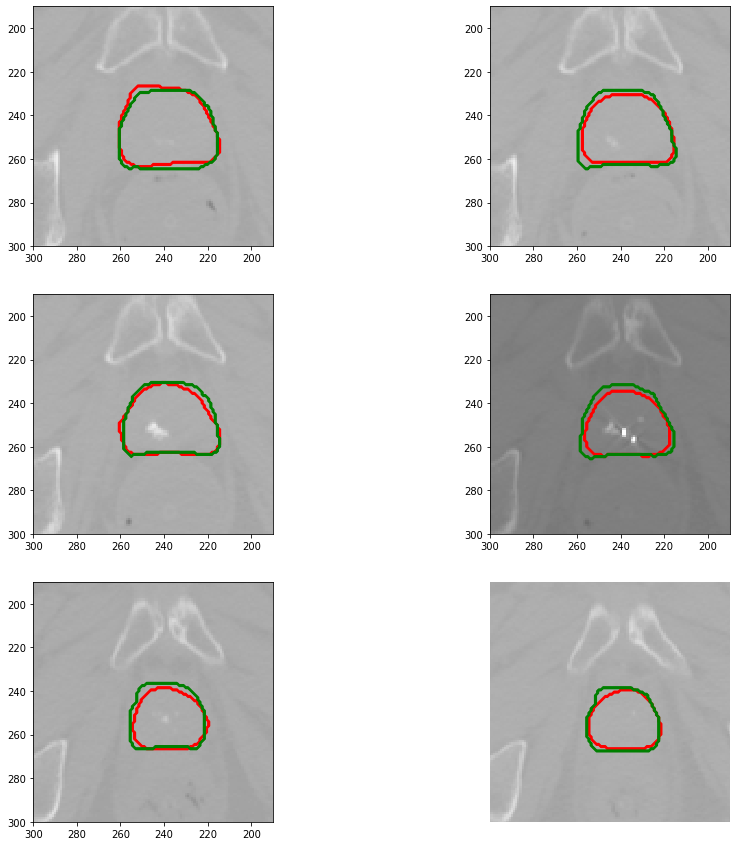

In [66]:
plt.figure(figsize=(15, 15))
L = [1, 2, 3, 4, 7, 8]
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.imshow(image1[..., L[i]  + 18 ], cmap="gray")
    plt.contour(assd_contour[..., L[i] + 18 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label1[..., L[i] + 18 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
plt.axis('off')

*-> Based on the above plots, we can see that the algorithm works fine on different slices of the same subject.*

# 5. 3D Plotting

In [54]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def make_mesh(image, threshold=-300, step_size=1):

    p = image.transpose(1,0,2)
    
    verts, faces, norm, val = measure.marching_cubes_lewiner(p, threshold, step_size=step_size, allow_degenerate=True) 
    return verts, faces

def plotly_3d(verts, faces):
    x,y,z = zip(*verts) 
    
    
    # Make the colormap single color since the axes are positional not intensity. 
#    colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interactive Visualization")
    iplot(fig)

def plt_3d(verts_1, faces_1, verts_2, faces_2, verts_3, faces_3):
    x,y,z = zip(*verts_1) 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh_1 = Poly3DCollection(verts_1[faces_1], linewidths=0.05, alpha=0.2)
    mesh_2 = Poly3DCollection(verts_2[faces_2], linewidths=0.05, alpha=0.3)
    mesh_3 = Poly3DCollection(verts_3[faces_3], linewidths=0.05, alpha=0.5)
    face_color = [1, 1, 0.9]
    mesh_1.set_facecolor(face_color)
    ax.add_collection3d(mesh_1, zdir="z")
    mesh_3.set_facecolor("r")
    ax.add_collection3d(mesh_3, zdir="z")
    mesh_2.set_facecolor("g")
    ax.add_collection3d(mesh_2, zdir="z")
    ax.set_xlim(0, max(x))
    ax.set_ylim(0, max(y))
    ax.set_zlim(0, 100)
    ax.set_facecolor((0.7, 0.7, 0.7))
    plt.show()

In [ ]:
v_1, f_1 = make_mesh(image1[190:300, 190:300, 0:50], 350)
v_2, f_2 = make_mesh(label1[190:300, 190:300, 0:50], 0)
v_3, f_3 = make_mesh(assd_contour[190:300, 190:300, 0:50], 0)
plt_3d(v_1, f_1, v_2, f_2, v_3, f_3)

# 6. Limitations and Future Works

1. The current algorithm is implemented on 2D images. Although, we can appy this countouring algorithm on multiple 2D images to create the 3D affect, we may work on desgining an algorithm specifically for 3D images in the future. 

2. In our implementation, we only focus on the voxel on the surface of ROI since our goal is to create DU contouring based on original contour. Interior voxel will be taken into consideration in future implementation for the purpose of radiation treatment planning if this works continue into that area. 

3. The performance of this contouring algorithm needs to be validated and compared against other existing solutions. We may need to do some research on the existing solutions of DU contouring. 
